  **The aim of this predictive analysis is to utilize machine learning techniques to predict whether a person has a disease or it comes from treatment or not.and in which days patient comes more.and we predict who can book more appointments between womens or mens**.


  **The healthcare dataset comprises information about patients, including gender, age, hypertension, and diabetes. The dataset is divided into a training set and a test set, with the training set used to train the predictive model and the test set used to evaluate its performance**.


  **Attribute** **Information**



  *   **Patient** **Id**: unique id
  *   **Appointment** **Id**: patient appointment id
  *   **Gender**: "male", "female"
  *   **Schedule** **day**: date on which an appointment is scheduled to occur
  *   **Appointment** **day**: date on which an appointment is scheduled to take place
  *   **Age**: age of a patient
  *   **Neighbourhood**: area where a patient resides
  *   **Scholarship**: 0 if the patient doesnot have hypertension, 1 if the patient has hypertension
  *   **Hypertension**: 0 if the patient doesnot have hypertension, 1 if the patient has hypertension
  *   **Diabetes**: 0 if the patient doesnot have hypertension, 1 if the patient has hypertension
  *   **Alcholosim**: 0 if the patient doesnot have hypertension, 1 if the patient has hypertension
  *   **Handcap**: 0 if the patient doesnot have hypertension, 1 if the patient has hypertension
  *   **SMS_recieved**: 0 if the patient doesnot have hypertension, 1 if the patient has hypertension
  *   **No**-**show**: no if the patient has no no-show,yes if the patent has no-show










**Import** **Libraries**

Let's import some libraries to get started!

In [ ]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

**Reading** **the** **dataset**

In [ ]:
base_data = pd.read_csv('Data.csv')

In [ ]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10780,7.711251e+13,5611911,M,2016-04-25T07:44:31Z,2016-05-16T00:00:00Z,17,JOANA D´ARC,0.0,0.0,0.0,0.0,0.0,0.0,Yes
10781,9.328428e+13,5665787,M,2016-05-05T15:18:00Z,2016-05-05T00:00:00Z,40,BELA VISTA,0.0,0.0,0.0,1.0,0.0,0.0,No
10782,5.958362e+13,5665972,F,2016-05-05T15:39:52Z,2016-05-05T00:00:00Z,5,BELA VISTA,1.0,0.0,0.0,0.0,0.0,0.0,No
10783,6.463875e+12,5692495,F,2016-05-12T15:30:42Z,2016-05-12T00:00:00Z,71,SANTO ANTÔNIO,0.0,1.0,0.0,0.0,0.0,0.0,No


**modifying** **the** **date** **and** **time** **into** **standard** **form**

In [ ]:
#modifying the date and time into standard form
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [ ]:
base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


**for the schedule day and appointment day storing the weekdays only into a variable**

In [ ]:
# 5 is Saturday, 6 is Sunday

base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek

In [ ]:
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [ ]:
base_data['sch_weekday'].value_counts()

4    2609
1    2328
2    2175
3    1855
0    1816
5       2
Name: sch_weekday, dtype: int64

In [ ]:
base_data['app_weekday'].value_counts()

4    4203
1    2130
0    1618
2    1569
3    1265
Name: app_weekday, dtype: int64

In [ ]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

**changing the name of some column whos spelling are not correct**

In [ ]:
#changing the name of some cloumns
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [ ]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [ ]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10785 entries, 0 to 10784
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PatientId       10785 non-null  float64       
 1   AppointmentID   10785 non-null  int64         
 2   Gender          10785 non-null  object        
 3   ScheduledDay    10785 non-null  datetime64[ns]
 4   AppointmentDay  10785 non-null  datetime64[ns]
 5   Age             10785 non-null  int64         
 6   Neighbourhood   10785 non-null  object        
 7   Scholarship     10784 non-null  float64       
 8   Hypertension    10784 non-null  float64       
 9   Diabetes        10784 non-null  float64       
 10  Alcoholism      10784 non-null  float64       
 11  Handicap        10784 non-null  float64       
 12  SMSReceived     10784 non-null  float64       
 13  NoShow          10784 non-null  object        
 14  sch_weekday     10785 non-null  int64         
 15  ap

**drop the column which are not required**

In [ ]:
# dropping some columns which have no significance
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [ ]:
base_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0.0,1.0,0.0,0.0,0.0,0.0,No,4,4
1,M,2016-04-29,2016-04-29,56,0.0,0.0,0.0,0.0,0.0,0.0,No,4,4
2,F,2016-04-29,2016-04-29,62,0.0,0.0,0.0,0.0,0.0,0.0,No,4,4
3,F,2016-04-29,2016-04-29,8,0.0,0.0,0.0,0.0,0.0,0.0,No,4,4
4,F,2016-04-29,2016-04-29,56,0.0,1.0,1.0,0.0,0.0,0.0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10780,M,2016-04-25,2016-05-16,17,0.0,0.0,0.0,0.0,0.0,0.0,Yes,0,0
10781,M,2016-05-05,2016-05-05,40,0.0,0.0,0.0,1.0,0.0,0.0,No,3,3
10782,F,2016-05-05,2016-05-05,5,1.0,0.0,0.0,0.0,0.0,0.0,No,3,3
10783,F,2016-05-12,2016-05-12,71,0.0,1.0,0.0,0.0,0.0,0.0,No,3,3


**statistical info of numerical column**

In [ ]:
#statistical info
base_data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,10785.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10785.000000,10785.000000
mean,37.854149,0.085126,0.195660,0.064262,0.059440,0.021142,0.322329,2.103755,2.399166
std,22.030057,0.279082,0.396726,0.245230,0.236457,0.155035,0.467390,1.421307,1.521379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,4.000000


**plotting the target variable "no-show"**

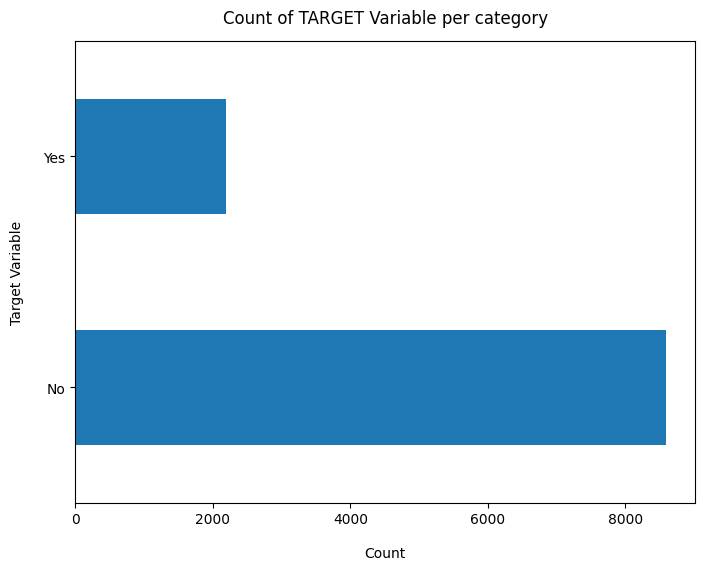

In [ ]:
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

**calculating the percentage of appointments or not**

In [ ]:
# calculating the % of appointments or not
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

No     79.629115
Yes    20.361613
Name: NoShow, dtype: float64

**its almost 20% for yes or almost 80% for no**

In [ ]:
base_data['NoShow'].value_counts()

No     8588
Yes    2196
Name: NoShow, dtype: int64

**finding missing values in a dataset**

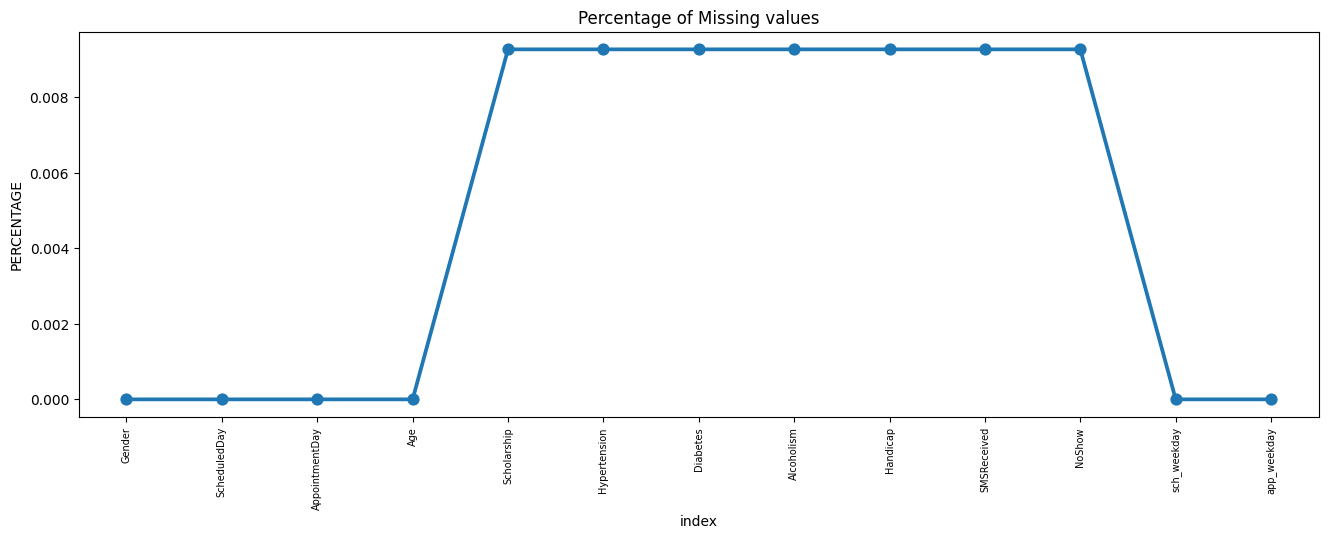

In [ ]:
# Having a look that data contains missing values or not
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**General Thumb Rules:**

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

**Data** **Cleaning**

Create a copy of base data for manupulation & processing

In [ ]:
new_data = base_data.copy()

**As we don't have any null records, there's no data cleaning required**

In [ ]:
# Get the max tenure
print(base_data['Age'].max()) #72

98


In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [ ]:
base_data.drop(['Age'], axis=1, inplace=True)

**Data** **Exploration**

In [ ]:
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

**having a loook into the values of count of each columns and there count in respect to NoShow column**

---------- Gender ----------
F    6344
M    4441
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-04-29    1283
2016-04-28     460
2016-04-27     429
2016-05-09     404
2016-05-10     390
              ... 
2016-03-19       1
2016-02-02       1
2015-11-10       1
2016-03-08       1
2016-02-03       1
Name: ScheduledDay, Length: 78, dtype: int64
---------- AppointmentDay ----------
2016-04-29    3235
2016-05-12     440
2016-05-19     440
2016-05-18     437
2016-05-31     437
2016-05-03     432
2016-05-24     430
2016-05-30     428
2016-05-10     424
2016-05-16     424
2016-05-17     407
2016-05-09     392
2016-05-05     385
2016-05-25     379
2016-05-11     377
2016-05-04     376
2016-05-02     374
2016-05-20     366
2016-05-13     328
2016-05-06     274
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0.0    9866
1.0     918
Name: Scholarship, dtype: int64
---------- Hypertension ----------
0.0    8674
1.0    2110
Name: Hypertension, dtype: int64
-

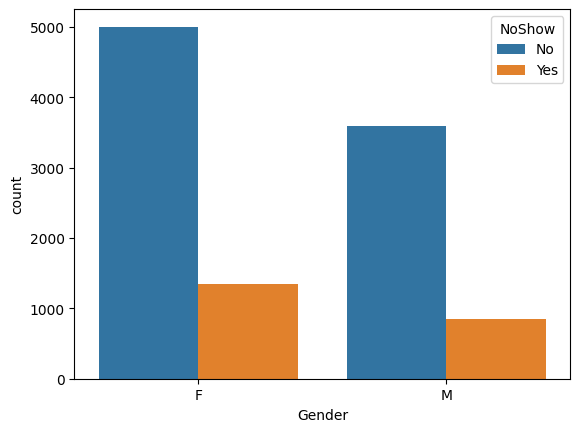

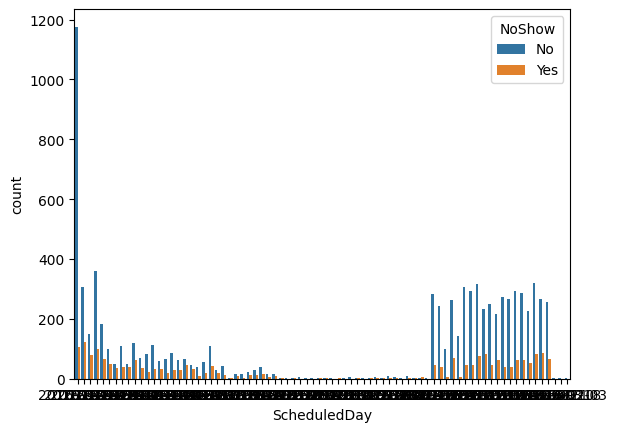

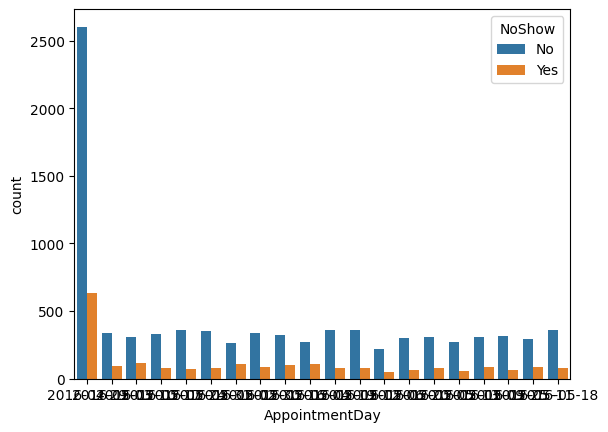

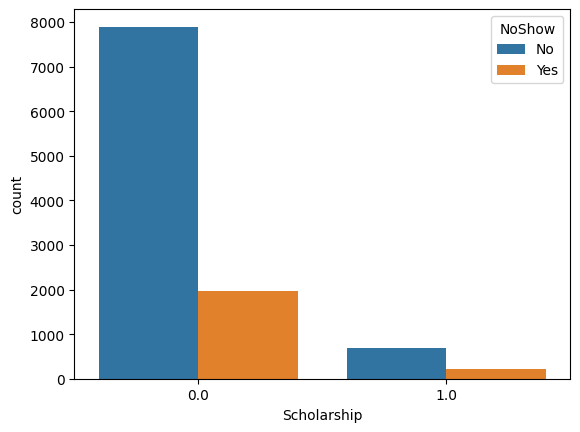

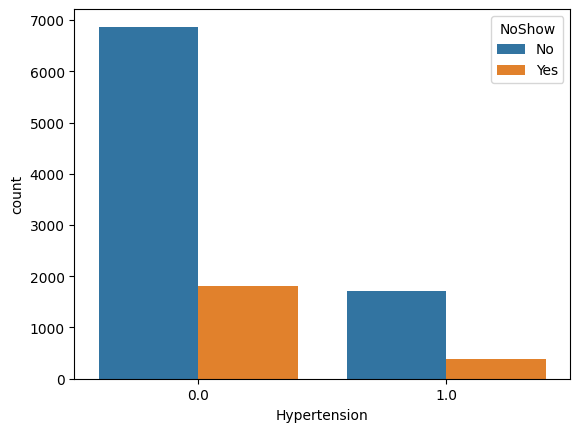

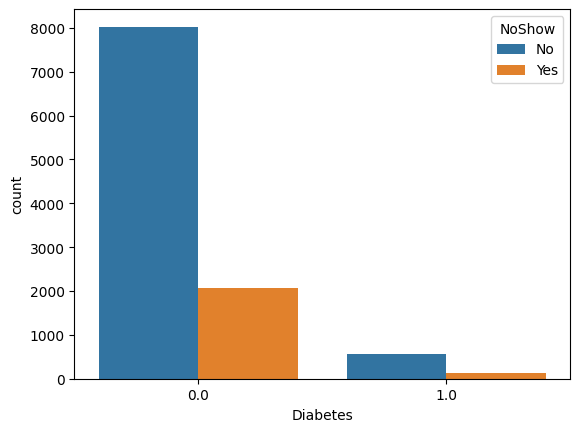

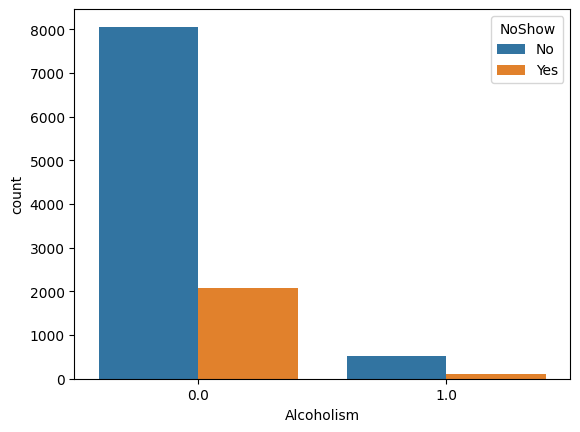

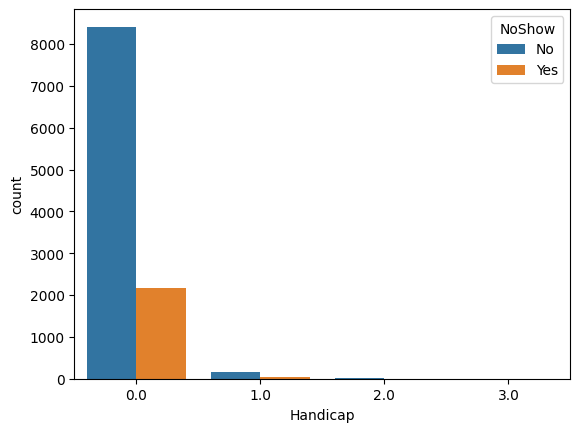

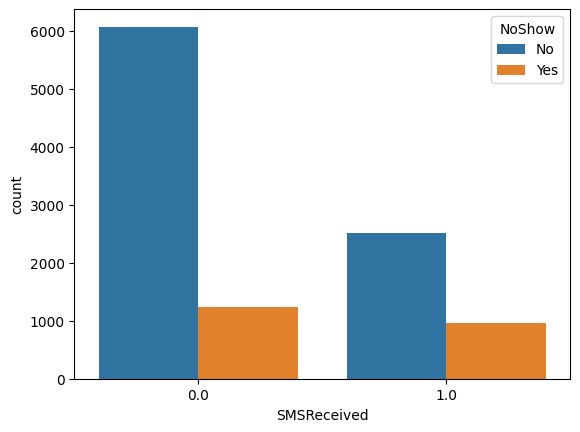

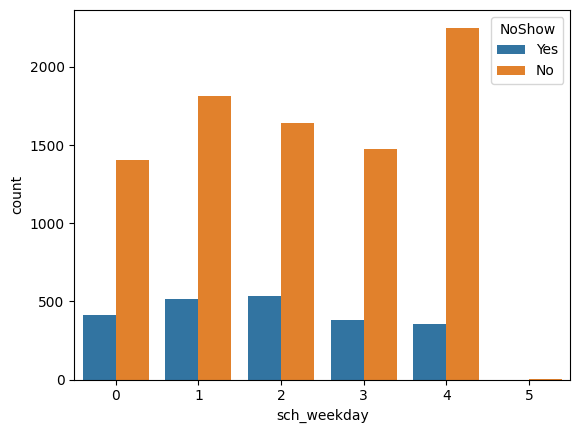

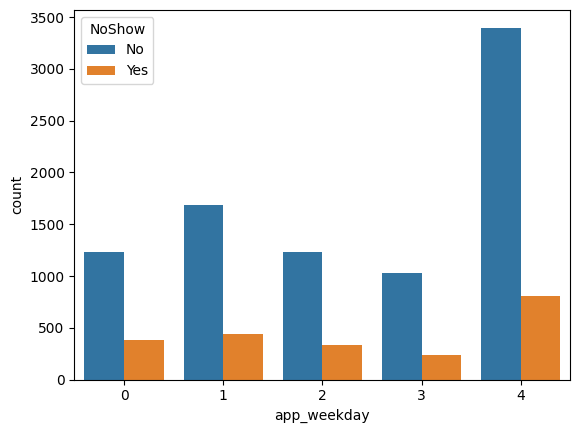

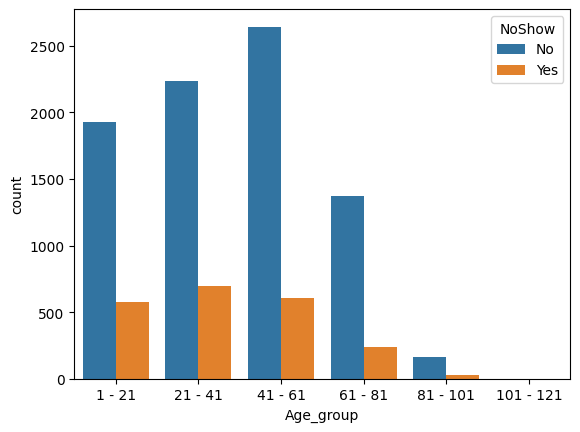

In [ ]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(base_data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(base_data[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='NoShow')

In [ ]:
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

In [ ]:
base_data.NoShow.value_counts()

0    8589
1    2196
Name: NoShow, dtype: int64

**Convert all the categorical variables into dummy variables**

In [ ]:
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0.0,1.0,0.0,0.0,0.0,0.0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0.0,0.0,0.0,0.0,0.0,0.0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0.0,0.0,0.0,0.0,0.0,0.0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0.0,0.0,0.0,0.0,0.0,0.0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0.0,1.0,1.0,0.0,0.0,0.0,0,4,4,1,0,0,0,1,0,0,0


**Build a corelation of all predictors with 'NoShow'**

<ipython-input-31-2af5ffecb2b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

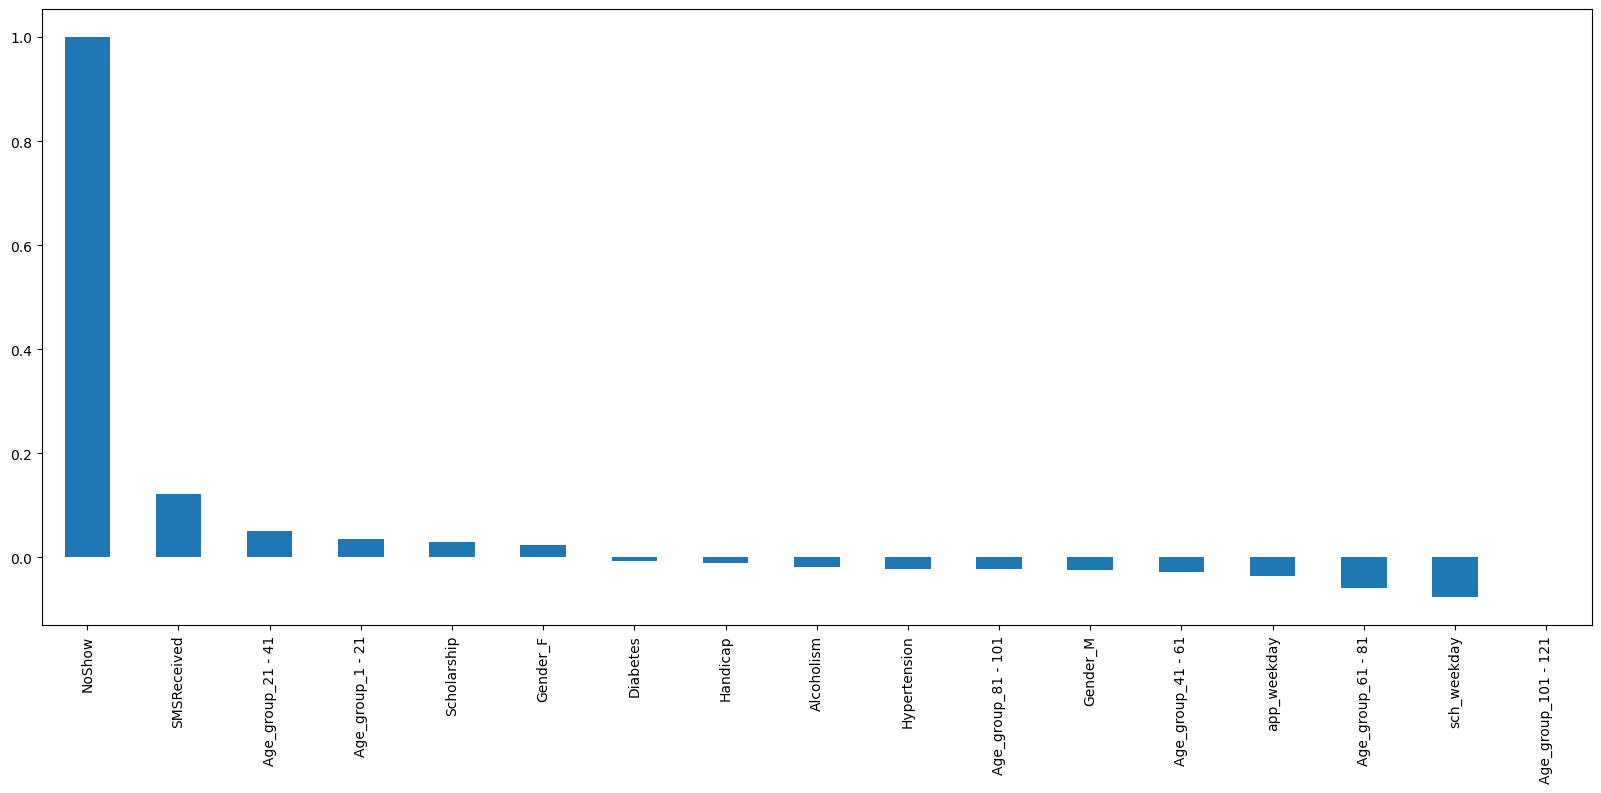

In [ ]:
plt.figure(figsize=(20,8))
base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<ipython-input-32-008e55dbac3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base_data_dummies.corr(), cmap="Paired")


<Axes: >

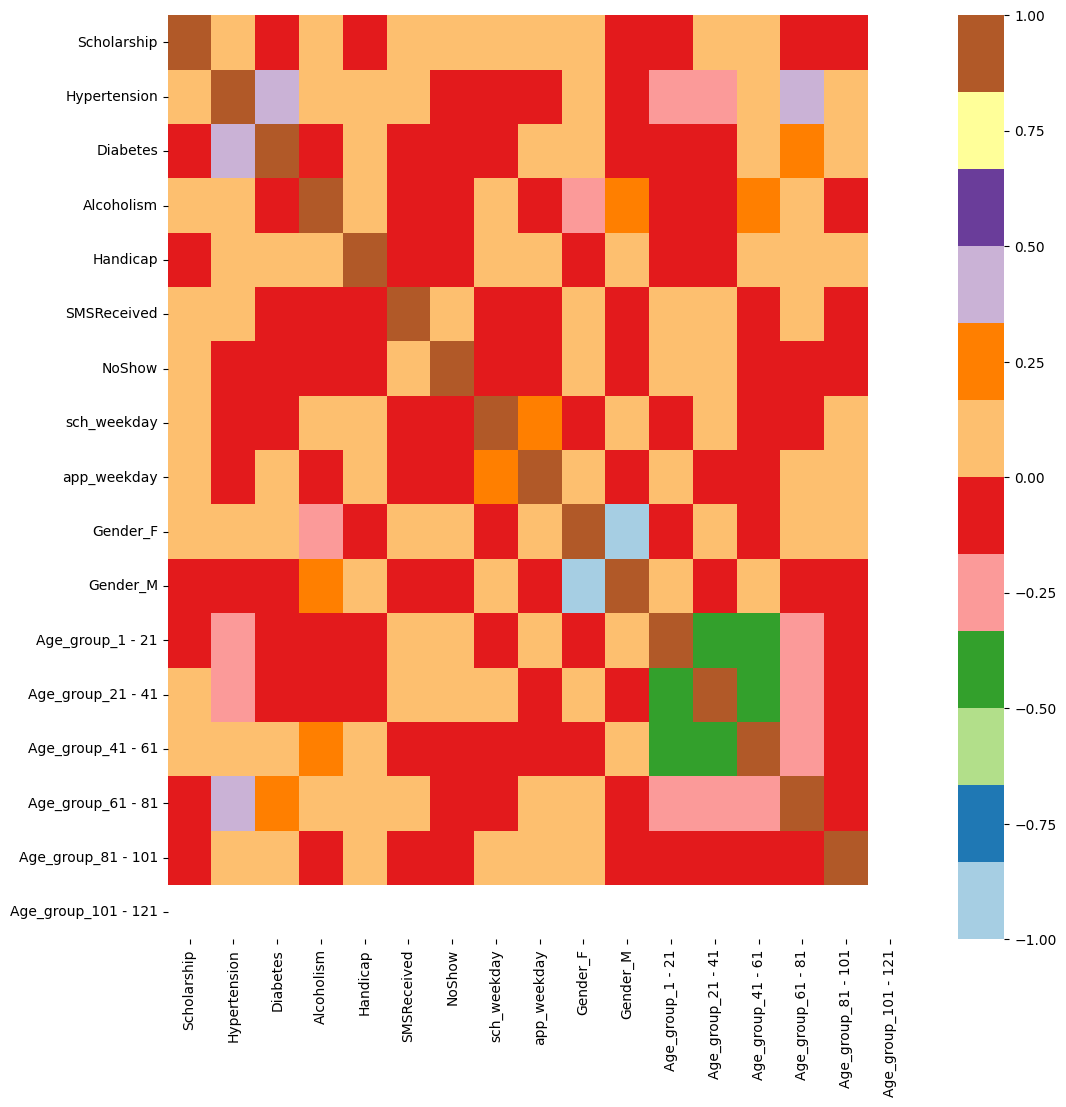

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")

**Bivariate Analysis**

In [ ]:
#bivarative analysis
new_df1_target0=base_data.loc[base_data["NoShow"]==0]
new_df1_target1=base_data.loc[base_data["NoShow"]==1]

In [ ]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

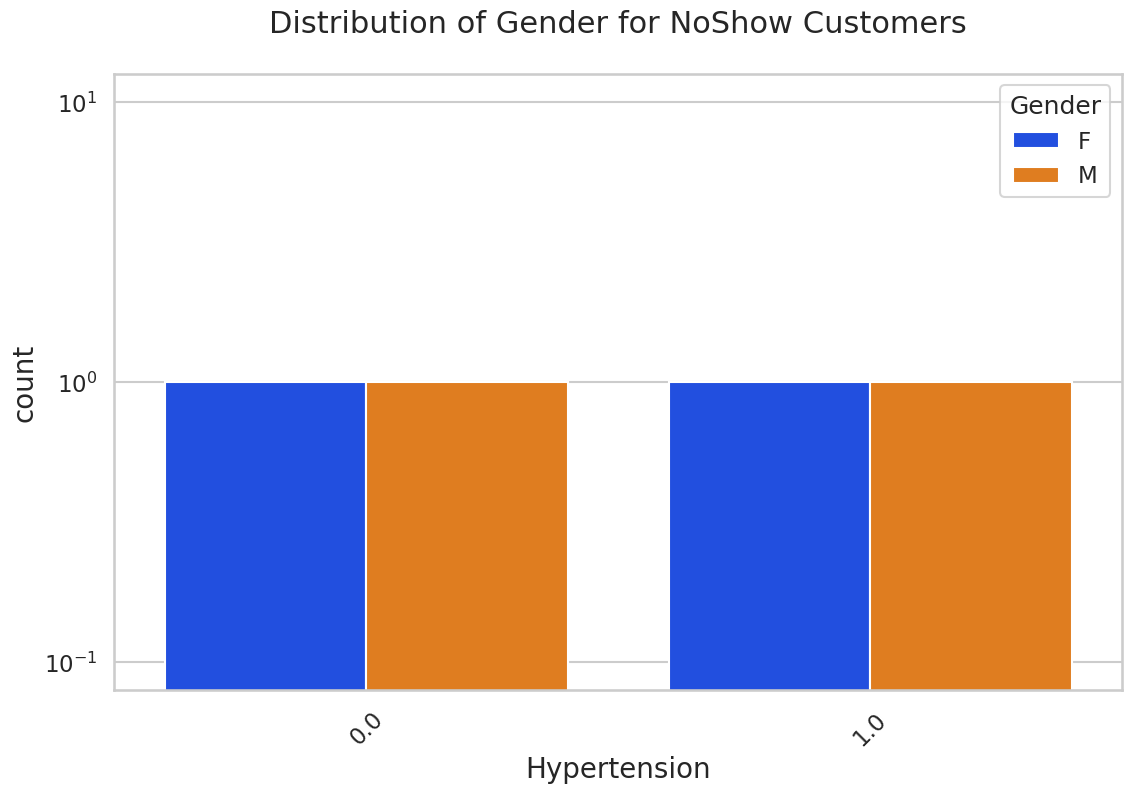

In [ ]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

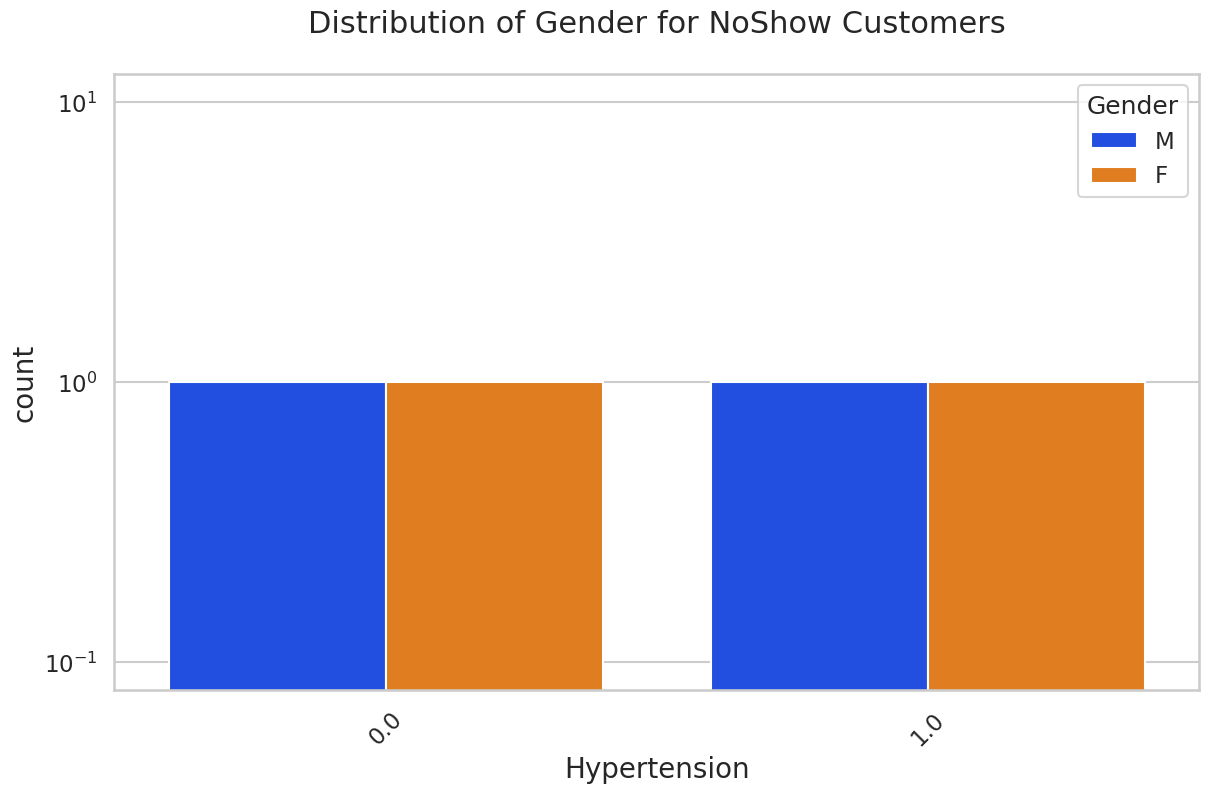

In [ ]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

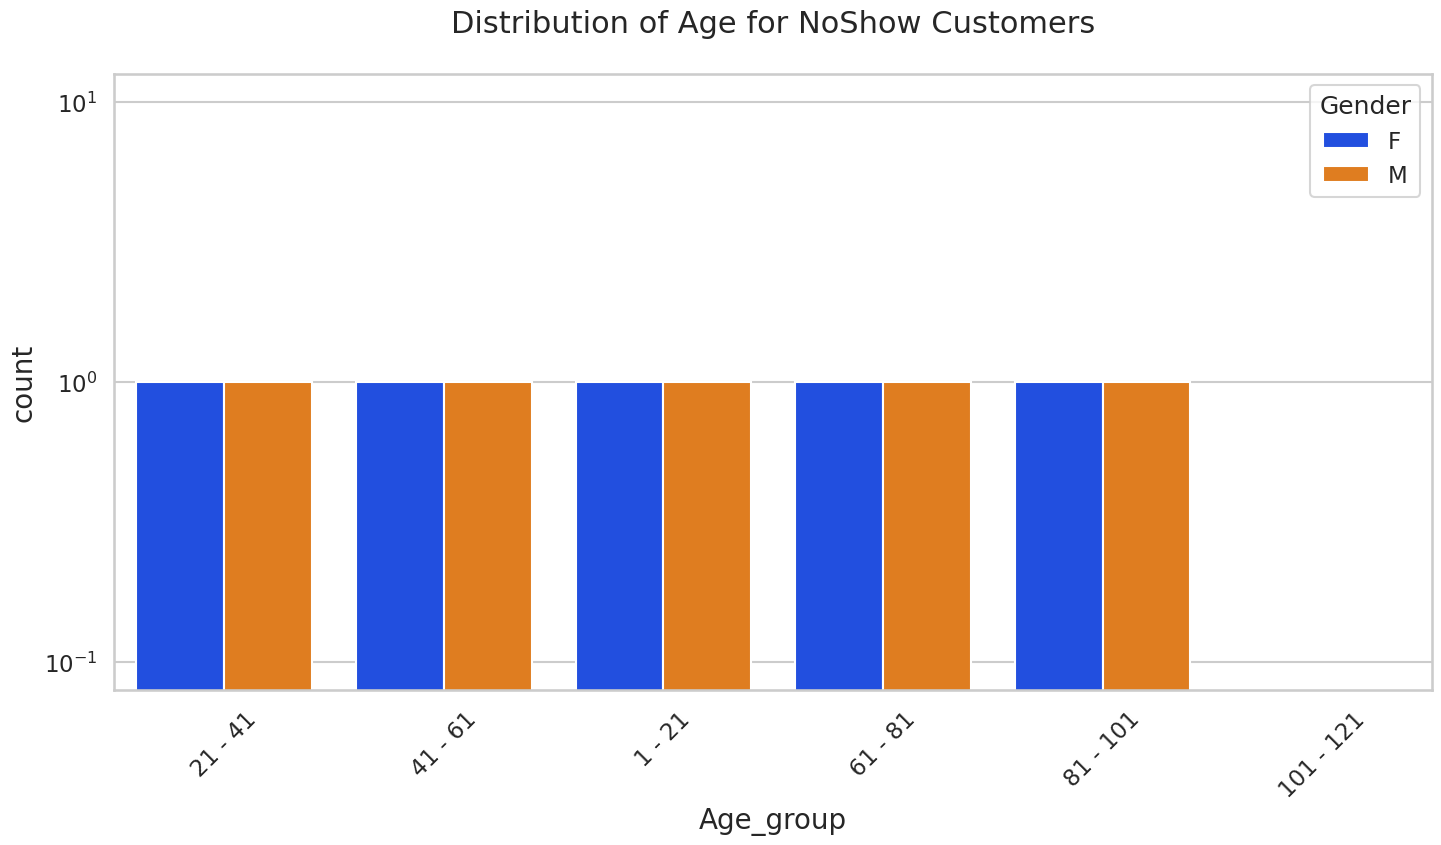

In [ ]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

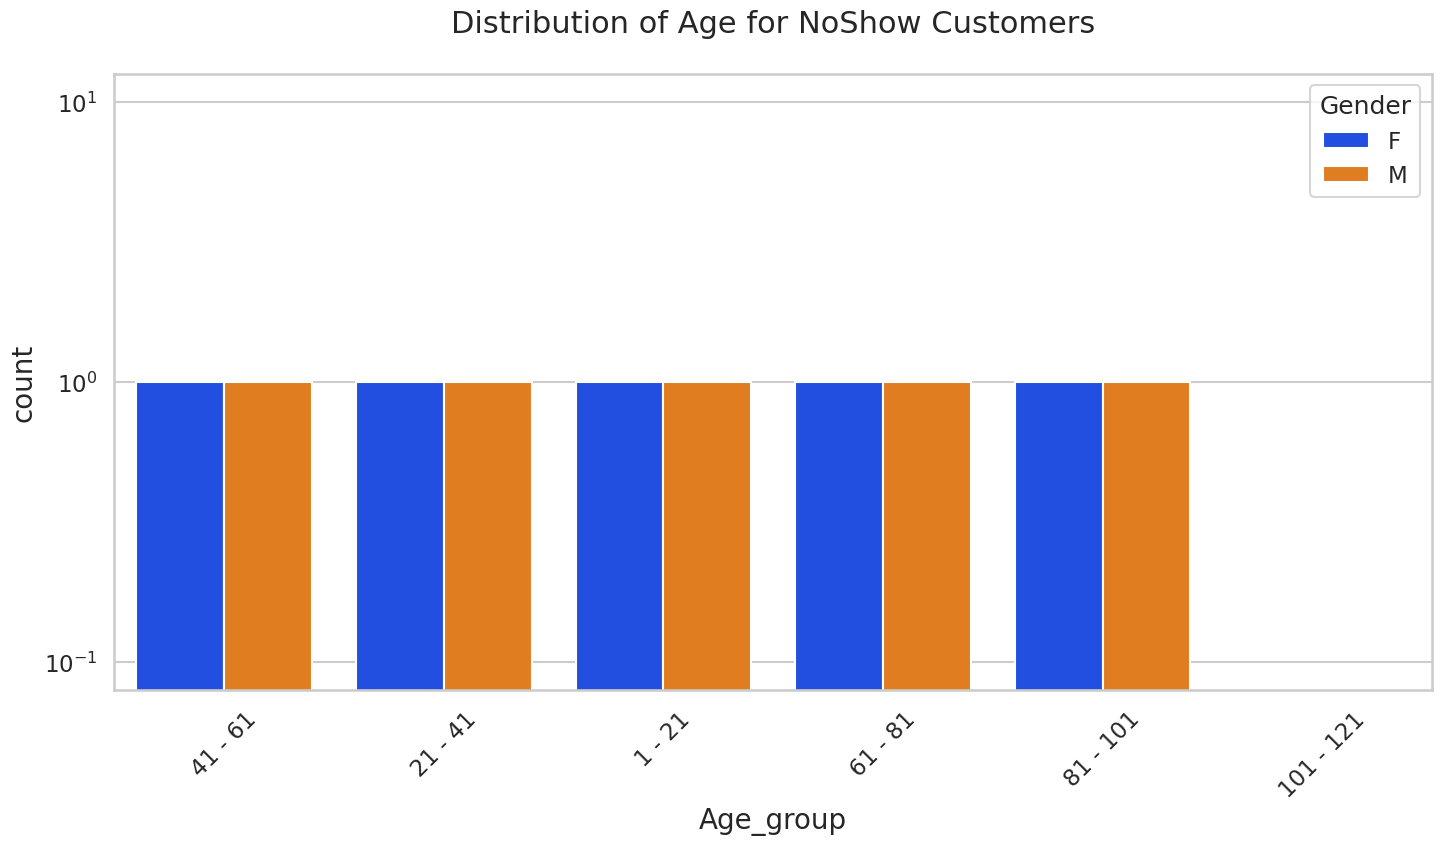

In [ ]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

**Findings**

1. Female patients have taken more appointments then male patients
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3. Each Neighbourhood have almost 80% show rate  
4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.  
5. there are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.  
6. there are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.  
7. there are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.  
8. there is no appointments on sunday and on saturday appointments are very less in comparision to other week days  


In [ ]:
#this dataset is need for cleaning ....this is not the right results..